# MAROUANE ZAIZOUNE
# Data science Internship
# LetsGrowMore
# Beginner Level
# Task 1: Iris Flowers Classification ML Project
This particular ML project is usually referred to as the “Hello World” of Machine Learning.

The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Dataset Description** 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

Iris flower can be divided into 3 species as per the length and width of their Sepals and Petals:

1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

## Loading the dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shape of Dataset
df.shape

(150, 6)

In [4]:
#Dataset Statistical Summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data cleaning

In [5]:
#Checking Null Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#Checking duplicates
df.duplicated().sum()

0

## Data visualization

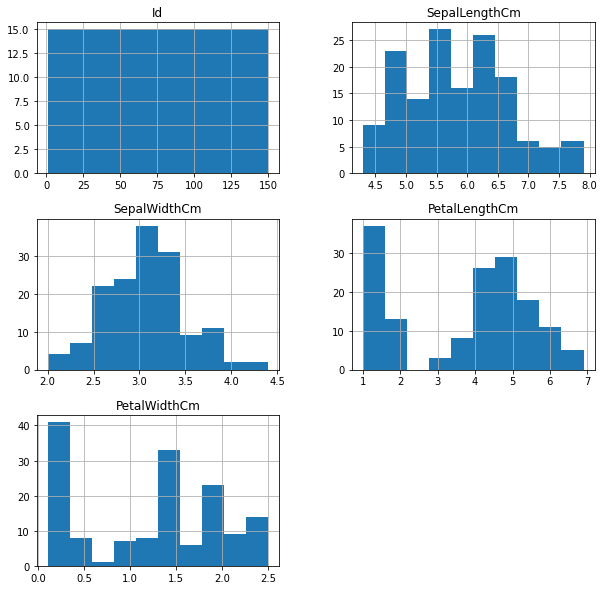

In [19]:
# Display histograms of the entire dataset

df.hist(figsize=(10,10))
plt.show()

In [7]:
# To display no. of samples on each class.
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

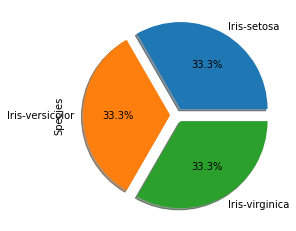

In [8]:
#Pie plot to show the overall types of Iris classifications
df['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])

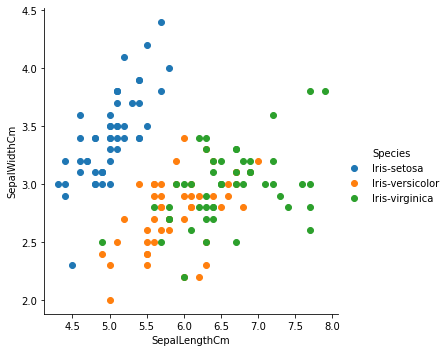

In [9]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

## Prediction

In [10]:
# Splitting dataset 
from sklearn.model_selection import train_test_split

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df.loc[:, features].values   #defining the feature matrix
Y = df.Species

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 40,random_state=0)

In [11]:
# Feature Scaling to bring all the variables in a single scale.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [12]:
# Importing some metrics for evaluating  models.
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [13]:
#Model Creation
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression(random_state = 0)

# model training
log_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_log = log_model.predict(X_Test)

In [14]:
print("Accuracy (Logistic Regression):",metrics.accuracy_score(Y_Test, Y_Pred_log)*100," %")

Accuracy (Logistic Regression): 97.5  %


In [15]:
# Model Creation
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()

# model training
dt_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_dt = dt_model.predict(X_Test)

In [16]:
print("Accuracy (Decision Tree):",metrics.accuracy_score(Y_Test, Y_Pred_dt)*100," %")

Accuracy (Decision Tree): 97.5  %
